IMPORTS

In [27]:
from pprint import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import umap
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import ttest_ind, f_oneway, ttest_rel, wilcoxon, kruskal, friedmanchisquare, probplot, shapiro
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from Hypothesis import HypothesisTester

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

FUNCTIONS

In [28]:
def standardize_data(data):
    """
    Standardize the data
    :param data: DataFrame
    :return: DataFrame
    """
    scaler = StandardScaler()
    return scaler.fit_transform(data.iloc[:, :-1])  # Exclude the 'Quality' column


def normalize_data(std_data):
    """
    Normalize the data
    :param data: DataFrame
    :return: DataFrame
    """
    scaler = MinMaxScaler()
    return scaler.fit_transform(std_data)


def creating_features(data):
    data['Density'] = data['Weight'] / data['Size']
    data['SA Combo'] = data['Acidity'] + data['Sweetness']
    data['Texture'] = data['Crunchiness'] + data['Juiciness']
    data['Size_Weight'] = data['Size'] + data['Weight']
    data['Size_Juiciness'] = data['Size'] + data['Juiciness']
    data['Juiciness_Sweetness'] = data['Juiciness'] + data['Sweetness']
    data['Juiciness_Ripeness'] = data['Juiciness'] ** 2 / data['Ripeness'] ** 2
    data['Size_Weight_Crunchiness'] = data['Size'] * data['Weight'] * data['Crunchiness']
    data['Sweetness_Acidity_Juiceness'] = (data['Sweetness'] + data['Acidity'] + data['Juiciness']) / 3
    data['Overall_Texture'] = (data['Sweetness'] + data['Crunchiness'] + data['Juiciness'] + data['Ripeness']) / 4
    data['JS_SAJ'] = data['Juiciness_Sweetness'] + data['Sweetness_Acidity_Juiceness']
    data['Crunchiness_Weight'] = data['Crunchiness'] + data['Weight']
    data['SSJ-R Combo'] = data['Size'] + data['Sweetness'] + data['Juiciness'] - data['Ripeness']


def plot_histogram(normalized_df):
    """
    Plot histogram for each feature
    :param normalized_df: DataFrame
    :return: None
    """
    num_features = len(normalized_df.columns[:-1])  # Exclude the 'Quality' column
    num_rows = (num_features + 3) // 4
    num_cols = min(num_features, 4)

    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    for i, column in enumerate(normalized_df.columns[:-1], start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(normalized_df[column], kde=True)
        plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()


def plot_correlation_matrix(normalized_df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(normalized_df.iloc[:, :-1].corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
    plt.title('Correlation Matrix')
    plt.show()


def apply_pca(dataset, n_components=None):
    # Apply PCA
    pca_model = PCA(n_components=n_components)
    pca_result = pca_model.fit_transform(dataset)
    return pca_result, pca_model


def plot_pca(pca_result, dataset):
    # Plot the PCA
    plt.figure(figsize=(12, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dataset['Quality'], s=50, alpha=0.5)
    plt.colorbar()
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA')
    plt.show()


def apply_umap(data_standardized):
    # Apply UMAP
    reducer = umap.UMAP()
    umap_result = reducer.fit_transform(data_standardized)
    return umap_result


def plot_umap(umap_result, quality_labels):
    # Plot the UMAP
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=quality_labels, palette='viridis', s=50, alpha=0.5)
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title('UMAP Projection')
    plt.legend(title='Quality')
    plt.show()


def paired_t_test(group1, group2):
    # Paired T-Test
    t_statistic, p_value = ttest_rel(group1, group2)
    return t_statistic, p_value

def shapiro_wilk_test(data):
# Shapiro-Wilk Test
    for column in data.columns:
        stat, p = shapiro(data[column])
        print("\n")
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print(column, 'Sample looks Gaussian (fail to reject H0)')
        else:
            print(column, 'Sample does not look Gaussian (reject H0)')

DATA LOADING AND PREPROCESSING

In [29]:
# Load the apples dataset
apples = pd.read_csv('apple_quality_labels.csv')

# Remove leading and trailing whitespace from column names
apples.columns = apples.columns.str.strip()

DATA STANDARDIZATION AND NORMALIZATION

In [30]:
# Standardize the data
standardized_data = standardize_data(apples)

# Normalize the data
normalized_data = normalize_data(standardized_data)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=apples.columns[:-1])

# Add the 'Quality' column back to the DataFrame
normalized_df['Quality'] = apples['Quality']

EXPLORATORY DATA ANALYSIS (EDA)

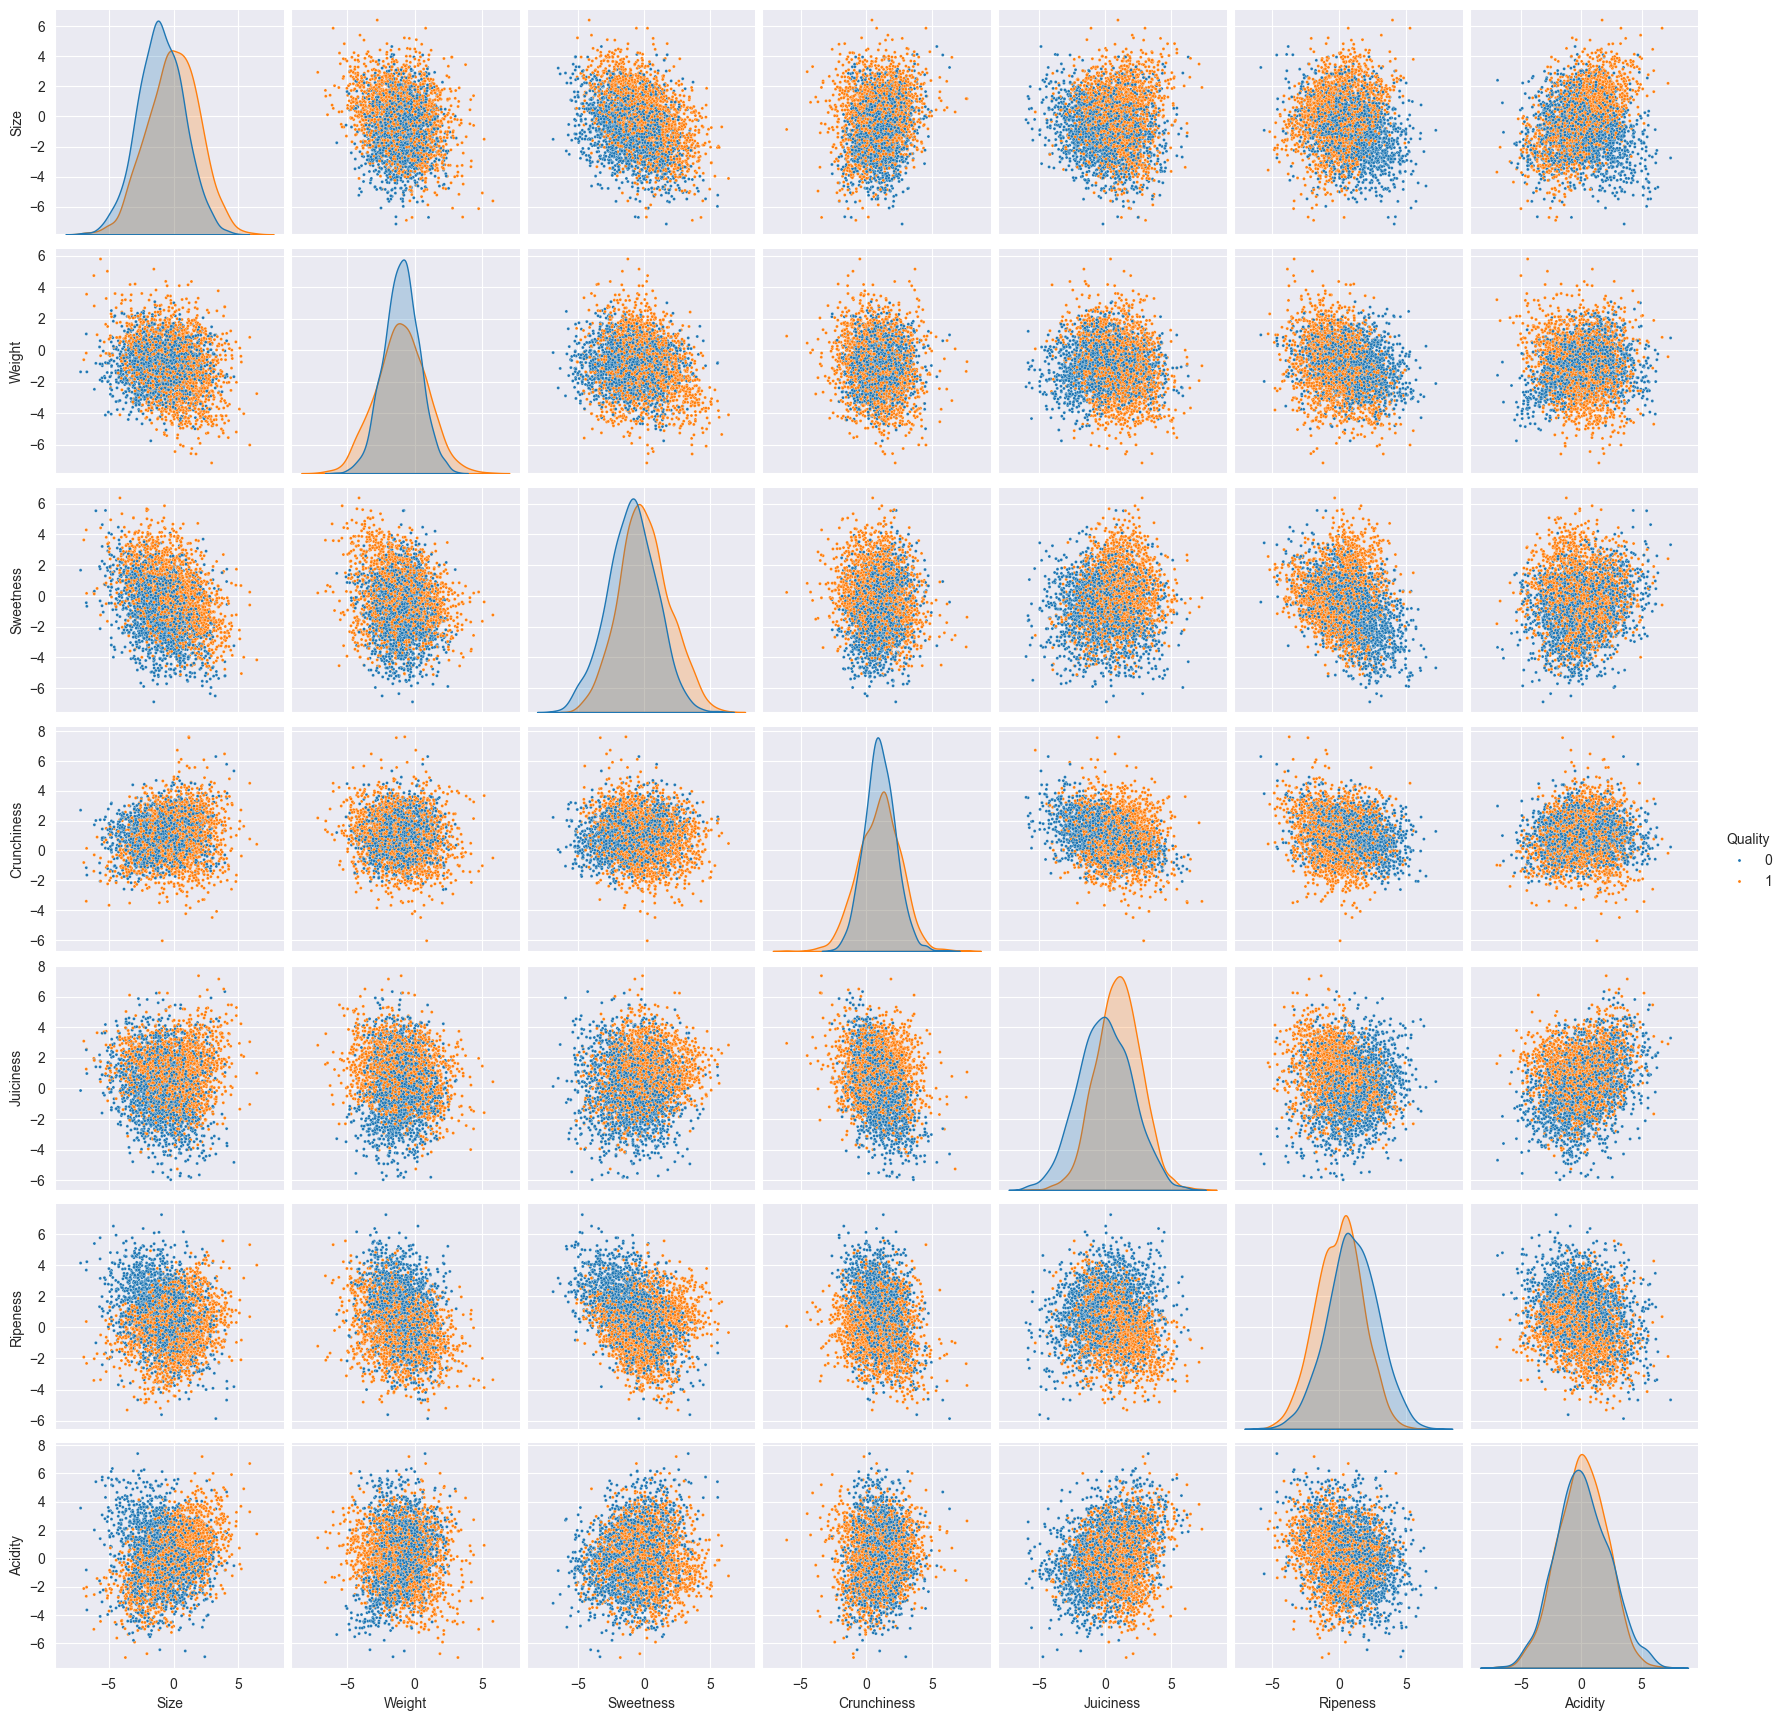

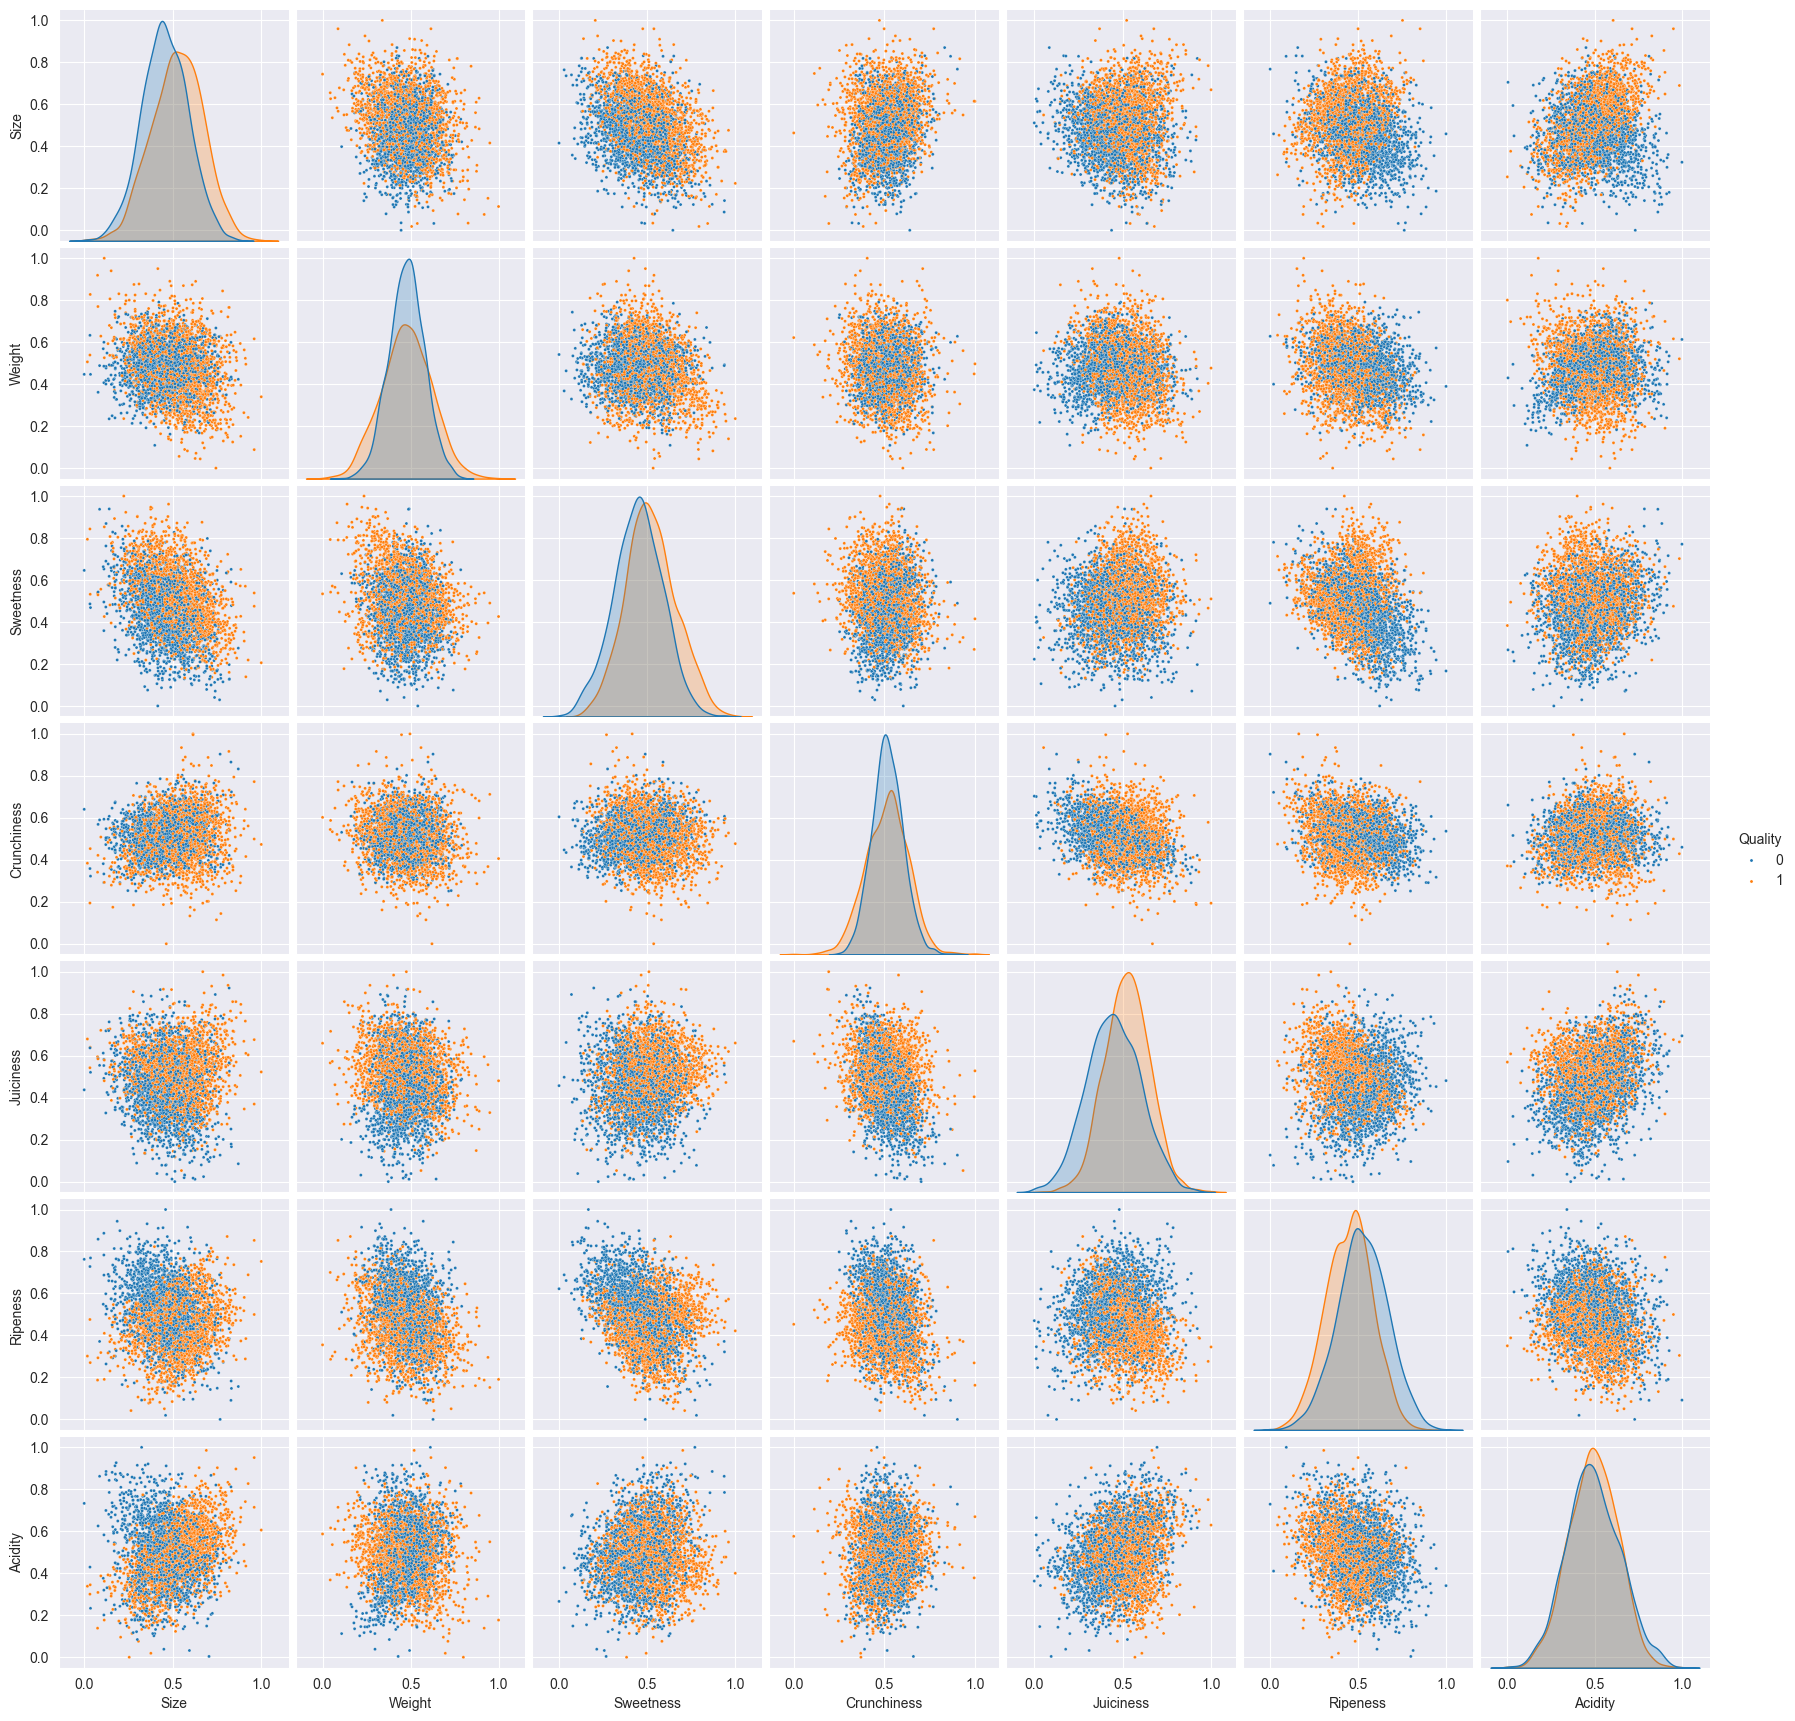

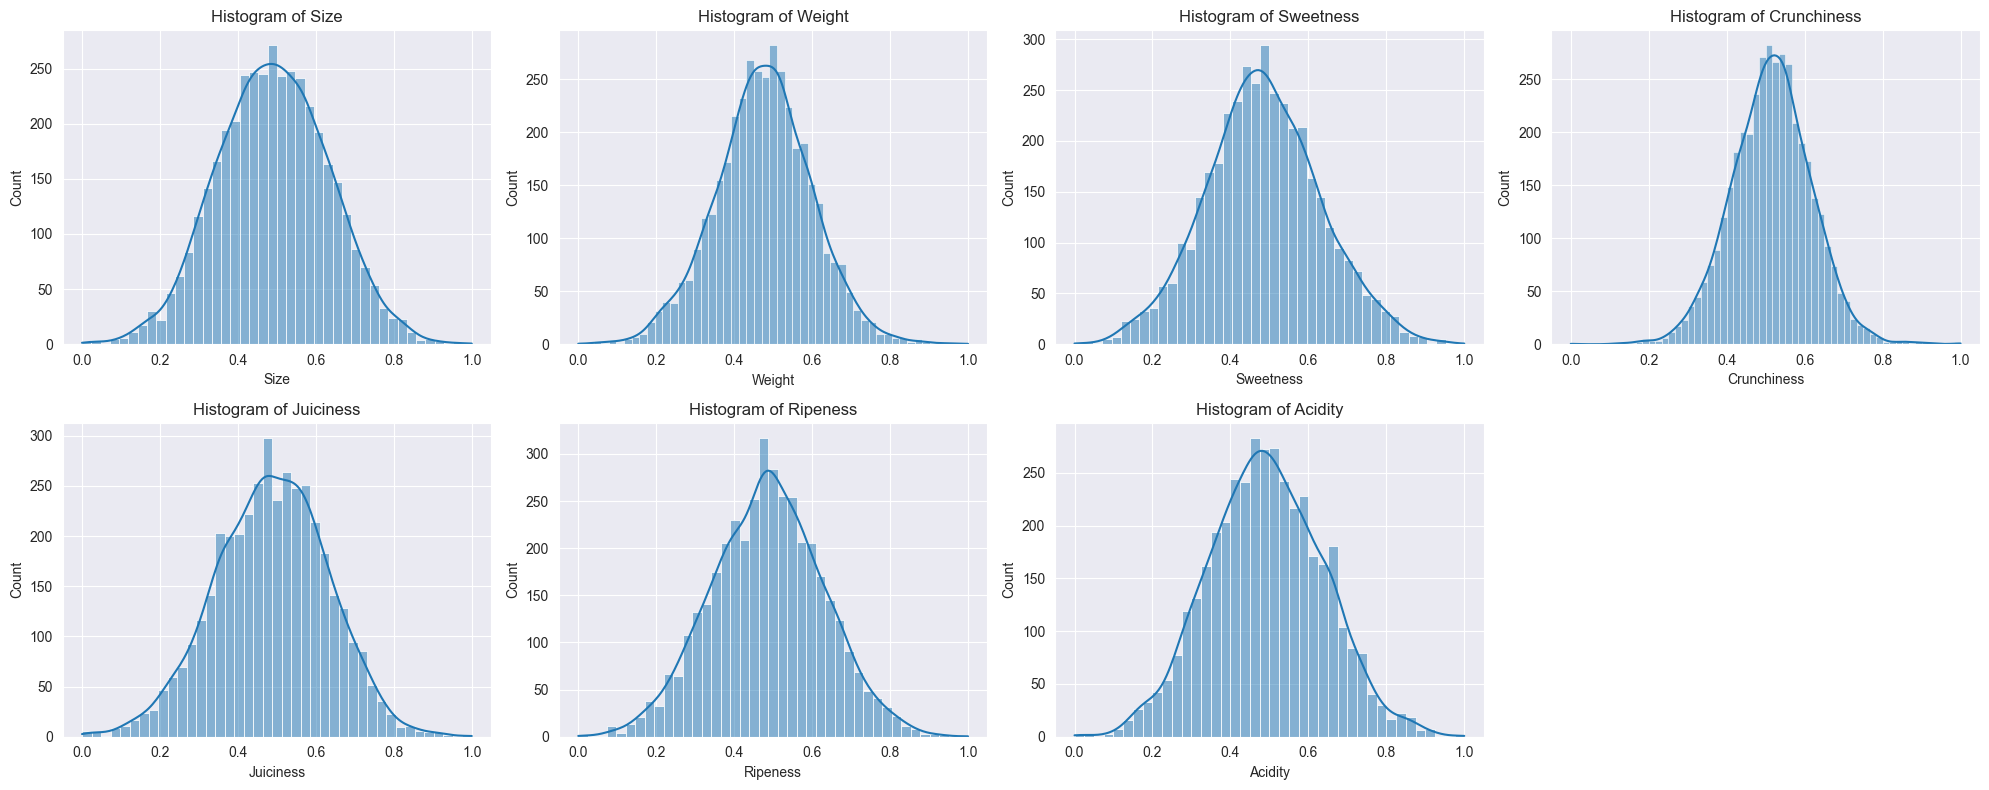

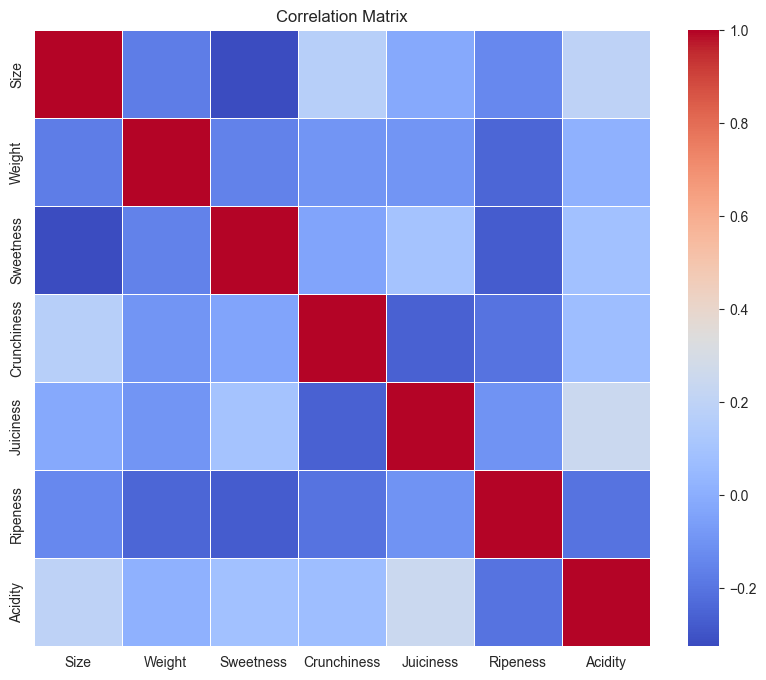

In [31]:
# Pairplot for overall distribution before making quality the last column
sns.pairplot(apples, hue='Quality', plot_kws={'s': 5})
plt.show()

# Making 'Quality' the last column
cols = list(apples.columns.values)
cols.pop(cols.index('Quality'))
apples = apples[cols + ['Quality']]

# Pairplot for overall distribution after standardization and normalization
sns.pairplot(normalized_df, hue='Quality', plot_kws={'s': 5})
plt.show()

# Plot histogram for each feature
plot_histogram(normalized_df)

# Correlation matrix
plot_correlation_matrix(normalized_df)

DIMENSIONALITY REDUCTION

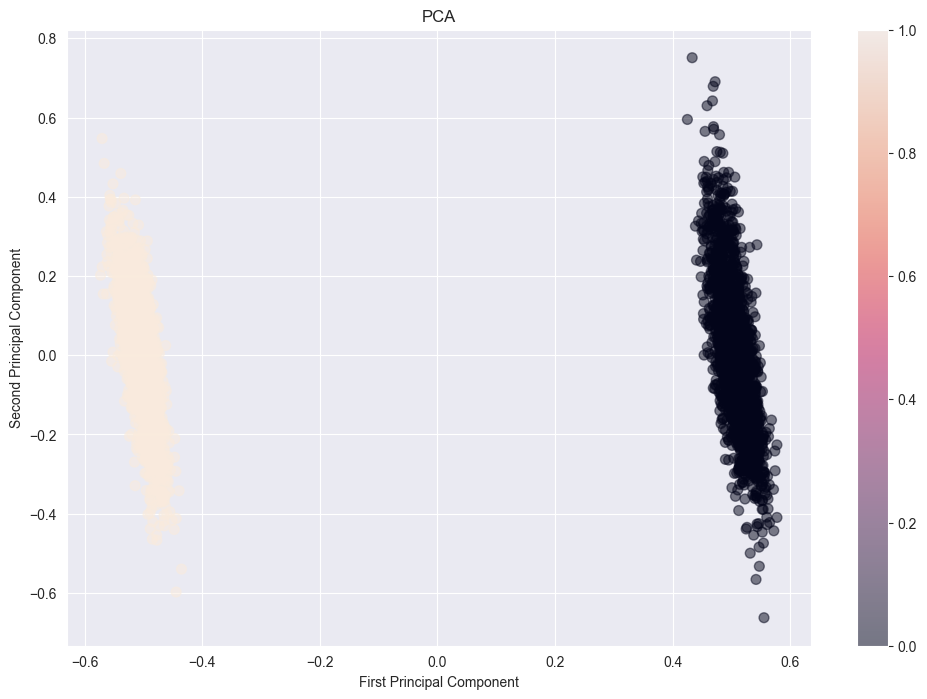

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'callable':[0m [1m[1mCannot determine Numba type of <class 'builtin_function_or_method'>[0m
[1m
File "venv\Lib\site-packages\umap\umap_.py", line 652:[0m
[1mdef fuzzy_simplicial_set(X, n_neighbors, random_state,
    <source elided>
    else:
[1m        if callable(metric):
[0m        [1m^[0m[0m
[0m 

This error may have been caused by the following argument(s):
- argument 2: [1mCannot determine Numba type of <class 'numpy.random.mtrand.RandomState'>[0m
- argument 4: [1mCannot determine Numba type of <class 'dict'>[0m


In [32]:
# Apply PCA
pca_result, pca_model = apply_pca(normalized_df, n_components=2)

# Plot PCA
plot_pca(pca_result, normalized_df)

# Apply UMAP
umap_result = apply_umap(standardized_data)

# Plot UMAP
plot_umap(umap_result, apples['Quality'])

STATISTICAL ANALYSIS

In [ ]:
# T-testing

# Extract groups without considering the 'Quality' column
group1 = normalized_df[normalized_df['Quality'] == 1].drop(columns=['Quality'])
group2 = normalized_df[normalized_df['Quality'] == 0].drop(columns=['Quality'])

# Ensure both groups have the same length
min_length = min(len(group1), len(group2))
group1 = group1[:min_length]
group2 = group2[:min_length]

# Perform paired t-test
t_statistic, p_value = ttest_rel(group1, group2)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Shapiro-Wilk Test
shapiro_wilk_test(normalized_df)

FEATURE CREATION

In [ ]:
# Create new features
creating_features(apples)

# Plot new features
sns.pairplot(apples, hue='Quality', plot_kws={'s': 5})
plt.title('Plot with new features')
plt.show()